In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay




In [2]:
fish = pd.read_csv('./data/fish.csv')
hearing = pd.read_csv('./data/hearing_test.csv')
airlines = pd.read_csv('./data/Invistico_Airline.csv')
mushroom = pd.read_csv('./data/secondary_data.csv')
weather = pd.read_csv('./data/weather_forecast_data.csv')

In [3]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
fish['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [6]:
def ommiter(value):
    if value == 'Perch':
        return 1
    elif value == 'Roach':
        return 1
    else:
        return 0

fish['Species_binary'] = fish['Species'].apply(ommiter)

fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         159 non-null    object 
 1   Weight          159 non-null    float64
 2   Length1         159 non-null    float64
 3   Length2         159 non-null    float64
 4   Length3         159 non-null    float64
 5   Height          159 non-null    float64
 6   Width           159 non-null    float64
 7   Species_binary  159 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [7]:
fish['Species_binary'].value_counts()

Species_binary
0    83
1    76
Name: count, dtype: int64

In [8]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         159 non-null    object 
 1   Weight          159 non-null    float64
 2   Length1         159 non-null    float64
 3   Length2         159 non-null    float64
 4   Length3         159 non-null    float64
 5   Height          159 non-null    float64
 6   Width           159 non-null    float64
 7   Species_binary  159 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [9]:
# features = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

# X = fish[features]

X = fish.drop(['Species', 'Species_binary'], axis=1)
y = fish['Species_binary']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train.shape

(127, 6)

In [10]:

#instantiate model
log_r = LogisticRegression(max_iter=200)

log_r.fit(x_train, y_train)


LogisticRegression(max_iter=200)

In [11]:
log_r.classes_

array([0, 1], dtype=int64)

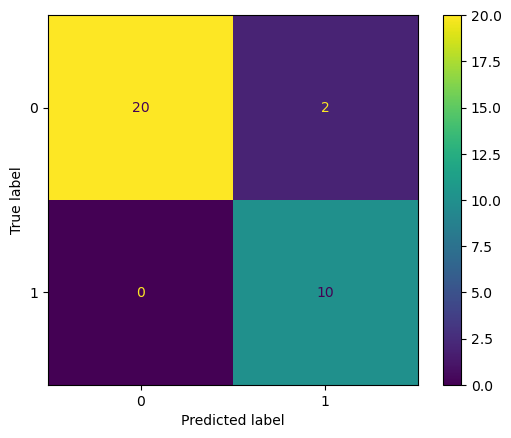

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#prediction
y_preds = log_r.predict(x_test)

#evaluation
cm = confusion_matrix(y_test, y_preds, labels=[0, 1])
ConfusionMatrixDisplay(cm ).plot()

In [13]:
from sklearn.metrics import accuracy_score

prec_lg = precision_score(y_test, y_preds)
rec_lg = recall_score(y_test, y_preds)
f1_lg = f1_score(y_test, y_preds)
acc_lg = accuracy_score(y_test, y_preds)


In [14]:
 
""" 
    criterion: Literal['gini', 'entropy', 'log_loss'] = "gini",
    splitter: Literal['best', 'random'] = "best",
    max_depth: Int | None = None,
    min_samples_split: float = 2,
    min_samples_leaf: float = 1,
    max_features: float | Literal['auto', 'sqrt', 'log2'] | None = None,
    random_state: Int | RandomState | None = None,
    max_leaf_nodes: Int | None = None,
"""

from sklearn.tree import DecisionTreeClassifier


#instantiate model
tree = DecisionTreeClassifier(random_state=24)


#training model
tree.fit(x_train, y_train)


DecisionTreeClassifier(random_state=24)

In [15]:
from sklearn.metrics import accuracy_score
y_preds_tree = tree.predict(x_test)


prec = precision_score(y_test, y_preds_tree)
acc = accuracy_score(y_test, y_preds_tree)
rec = recall_score(y_test, y_preds_tree)
f1_tree = f1_score(y_test, y_preds_tree)

print(f'Decision_tree --> Precision: {prec}, Accuracy: {acc}, Recall: {rec}, F1: {f1_tree}')
print(f'Logistic Reg --> Precision: {prec_lg}, Accuracy: {acc_lg}, Recall: {rec_lg}, F1: {f1_lg}')

Decision_tree --> Precision: 0.7692307692307693, Accuracy: 0.90625, Recall: 1.0, F1: 0.8695652173913043
Logistic Reg --> Precision: 0.8333333333333334, Accuracy: 0.9375, Recall: 1.0, F1: 0.9090909090909091


In [16]:
from sklearn.model_selection import GridSearchCV


# # hyperparameter tuning
# grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [i for i in range(1, 100)],
#     'min_samples_split': [4, 12, 20, 50, 100],
#     'min_samples_leaf': [1, 2, 5, 10, 30],
#     'random_state': [i for i in range(1, 50)]
# }  
# hyperparameter tuning
grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [4, 12, 20, 50, 100],
    'min_samples_leaf': [1, 2, 5, 10, 30]
} 
# tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=24), param_grid=grid, scoring='accuracy', cv=3 )  ## A

# grid_search = GridSearchCV(estimator=tree, param_grid=grid, scoring='accuracy', cv=3  )  ## B
""" 
X_train & y_train

make 3 subsets of these datasets

A, B, C
"""


grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5, 10, 30],
                         'min_samples_split': [4, 12, 20, 50, 100]},
             scoring='accuracy')

In [17]:
grid_search.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [18]:
grid_search.best_score_

0.7794389073458841

In [19]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         159 non-null    object 
 1   Weight          159 non-null    float64
 2   Length1         159 non-null    float64
 3   Length2         159 non-null    float64
 4   Length3         159 non-null    float64
 5   Height          159 non-null    float64
 6   Width           159 non-null    float64
 7   Species_binary  159 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [23]:
fish[['Height', 'Width', 'Weight', 'Species']].tail(10)

,Height,Width,Weight,Species
149,2.0832,1.2772,9.8,Smelt
150,1.9782,1.2852,8.7,Smelt
151,2.2139,1.2838,10.0,Smelt
152,2.2139,1.1659,9.9,Smelt
153,2.2044,1.1484,9.8,Smelt
154,2.0904,1.3936,12.2,Smelt
155,2.4300,1.2690,13.4,Smelt
156,2.2770,1.2558,12.2,Smelt
157,2.8728,2.0672,19.7,Smelt
158,2.9322,1.8792,19.9,Smelt


In [24]:
fish[['Height', 'Width', 'Weight', 'Species']].head(10)

,Height,Width,Weight,Species
0,11.5200,4.0200,242.0,Bream
1,12.4800,4.3056,290.0,Bream
2,12.3778,4.6961,340.0,Bream
3,12.7300,4.4555,363.0,Bream
4,12.4440,5.1340,430.0,Bream
5,13.6024,4.9274,450.0,Bream
6,14.1795,5.2785,500.0,Bream
7,12.6700,4.6900,390.0,Bream
8,14.0049,4.8438,450.0,Bream
9,14.2266,4.9594,500.0,Bream


## Assumptions of Linear Regresssion
1. **Linearity** - a change in the features means a change in the target.
2. **Independence** - values are assumed to be independent of each other, meaning one entry does not affect the next/any entry.
3. **Normality** - the residuals(difference between y_test and y_preds) is assumed to be normally distributed.
4. **Homoscedasticity** - variance of the residuals should be spread normally/evenly.

*LINE*

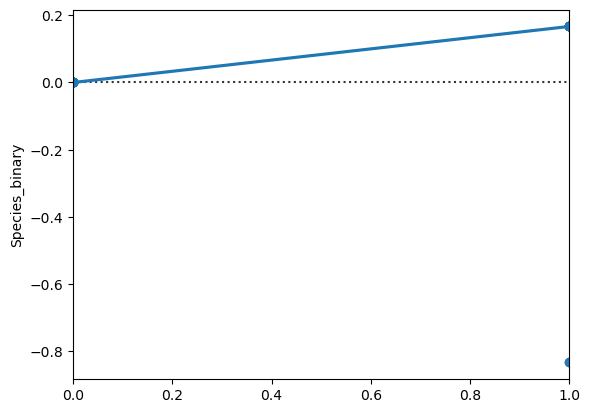

In [26]:
#creating residuals
residuals_log_r = y_test - y_preds


sns.residplot(x=y_preds, y=residuals_log_r, lowess=True)
plt.show()

In [ ]:
# StandardScaler()
# MinMaxScaler()

In [30]:
y_score_log_r = log_r.predict_proba(x_test)[:,1]
y_score_tree = tree.predict_proba(x_test)[:,1]

In [33]:
y_score_log_r

array([0.9421999 , 0.25739079, 0.18182418, 0.64765642, 0.91903781,
       0.00314929, 0.33105252, 0.69600047, 0.951659  , 0.01814119,
       0.03342468, 0.17852912, 0.02451864, 0.35507341, 0.00397813,
       0.00228334, 0.98465568, 0.91398579, 0.77192984, 0.00462467,
       0.27260821, 0.00418165, 0.00258591, 0.00963654, 0.00187011,
       0.77293589, 0.89119713, 0.62789559, 0.28709919, 0.20175761,
       0.06148498, 0.91032119])

In [36]:
# recall = tp / actual positives(TP + FN)
# fpr = fp / tn + fp

from sklearn.metrics import roc_curve, auc


fpr_log_r, tpr_log_r, _ = roc_curve(y_test, y_score_log_r)
fpr_log_tree, tpr_log_tree, _ = roc_curve(y_test, y_score_tree)


C:\Users\marwa\AppData\Local\Temp\ipykernel_17016\3709839215.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


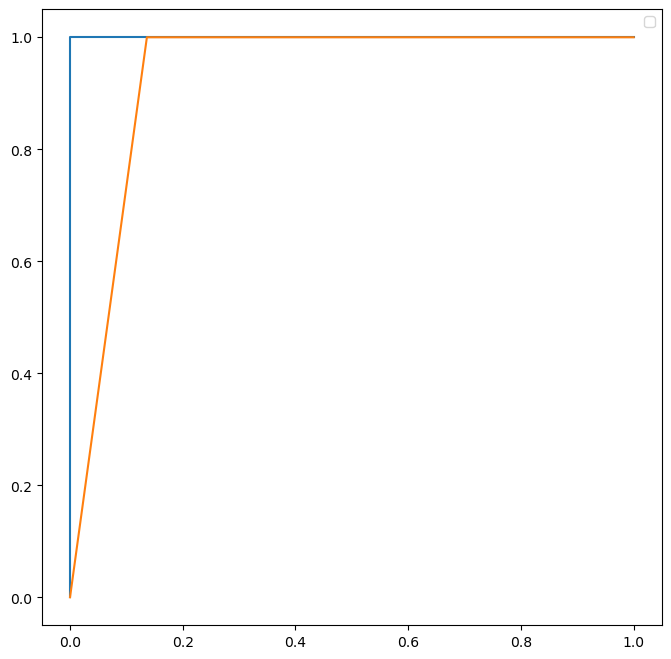

In [46]:
plt.figure(figsize=(8, 8))
plt.plot(fpr_log_r, tpr_log_r)
plt.plot(fpr_log_tree, tpr_log_tree)
plt.legend()
plt.show()

### Ensemble Methods


In [29]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(random_state=24, n_estimators=10000)

forest.fit(x_train, y_train)



RandomForestClassifier(n_estimators=10000, random_state=24)

In [30]:
y_preds_forest = forest.predict(x_test)



prec_forest = precision_score(y_test, y_preds_forest)
acc_forest = accuracy_score(y_test, y_preds_forest)
rec_forest = recall_score(y_test, y_preds_forest)
f1_forest = f1_score(y_test, y_preds_forest)


print(f'Decision_tree --> Precision: {prec}, Accuracy: {acc}, Recall: {rec}, F1: {f1_tree}')
print(f'Logistic Reg --> Precision: {prec_lg}, Accuracy: {acc_lg}, Recall: {rec_lg}, F1: {f1_lg}')
print(f'Random Forest --> Precision: {prec_forest}, Accuracy: {acc_forest}, rec_forestall: {rec_forest}, F1: {f1_lg}')

Decision_tree --> Precision: 0.7692307692307693, Accuracy: 0.90625, Recall: 1.0, F1: 0.8695652173913043
Logistic Reg --> Precision: 0.8333333333333334, Accuracy: 0.9375, Recall: 1.0, F1: 0.9090909090909091
Random Forest --> Precision: 0.7692307692307693, Accuracy: 0.90625, rec_forestall: 1.0, F1: 0.9090909090909091
